# INFO 498 Final Project

### Train data statistics

YelpNLG: Review Corpus for NLG
 [Curate and Generate: A Corpus and Method for Joint Control of Semantics and Style in Neural NLG](https://aclanthology.org/P19-1596) (Oraby et al., ACL 2019)

In [3]:
# load dataset
import pandas as pd

df_train = pd.read_csv('data/yelpnlg-train.csv')

display(df_train.head())

,id,ref,mr,sentiment,length,first_person,exclamation
0,0,best corn beef and pastrami combo sandwich and...,food||corn_beef||amazing||mention_1 food||past...,positive,len_medium,not_first_person,has_exclamation
1,1,"""he said it did not taste good , and it appear...",food||tomato||canned||mention_1 food||onion||n...,negative,len_long,not_first_person,no_exclamation
2,2,i usually get the dal gal bee chicken dish tha...,food||dal_gal_bee_chicken_dish||no_adj||mentio...,neutral,len_medium,first_person,no_exclamation
3,3,"""the pho was very flavourful , good firm rice ...",food||pho||flavourful||mention_1 food||firm_ri...,positive,len_long,not_first_person,no_exclamation
4,4,"""the spices they use to fry their chicken are ...",food||spices||no_adj||mention_1 food||fry||no_...,positive,len_long,not_first_person,no_exclamation


#### Columns Described

* id - A sequential identifier of the instance in that split.
* ref - The reference text (review sentence) for that instance.
* mr - The meaning representation (mr) for that instance. Each MR is a set of space-separated tuples, and each is tuple
is divided with "||" separators. Each tuple contains the following information (in this order):
    * attribute - one of: {"restaurant", "cuisine", "food", "service", "staff", "ambiance", "price"}
    * value - any value (from attribute lexicons)
    * adjective - any adjective (from sentence dependency parse), else "no_adj" if none is available/retrievable in the parse
    * mention - mention_N (N indicates which mention is being referenced, i.e. 1 for first mention, 2 for second mention, etc.)
* sentiment - "positive" (4-5 stars), "neutral" (3 stars), "negative" (1-2 stars)
* length - "len_short" (4-10 tokens), "len_medium" (10-20 tokens), "len_long" (20-30 tokens)
* first_person - "first_person" (includes a first person pronoun: {"i", "my", "me", "our", "we", "us"}), "not_first_person" (does not include any first person pronouns)
* exclamation - "has_exclamation" (include an exclamation mark), "no_exclamation" (does not include an exclamation mark)

In [5]:
# total reviews
total_reviews = len(df_train)

# total amount of each sentiment
sentiments = {'positive': 0, 'negative': 0, 'neutral': 0}

for sentiment in df_train['sentiment']:
    # check for positive
    if sentiment == 'positive':
        sentiments[sentiment] += 1
    # check for negative
    elif sentiment == 'negative':
        sentiments[sentiment] += 1
    # check for neutral
    elif sentiment == 'neutral':
        sentiments[sentiment] += 1

# total amount of each length of review
total_lengths = {'short': 0, 'medium': 0, 'long': 0}

for length in df_train['length']:
    # check for short
    if length == 'len_short':
        total_lengths['short'] += 1
    # check for medium
    if length == 'len_medium':
        total_lengths['medium'] += 1
    # check for long
    if length == 'len_long':
        total_lengths['long'] += 1

# longest and shortest review
shortest = float('inf')
longest = 0

for review in df_train['ref']:
    review_len = len(review)
    # find shortest
    if review_len < shortest:
        shortest = review_len
    # find longest
    if review_len > longest:
        longest = review_len

# first person/non first person totals
pov_totals = {'first person': 0, 'not first person': 0}

for pov in df_train['first_person']:
    # check for first
    if pov == 'first_person':
        pov_totals['first person'] += 1
    # check for non first
    if pov == 'not_first_person':
        pov_totals['not first person'] += 1

# exclamation vs no exclamation
exclamation_totals = {'exclamation': 0, 'no exclamation': 0}

for exclamation in df_train['exclamation']:
    # check for exclamation
    if exclamation == 'has_exclamation':
        exclamation_totals['exclamation'] += 1
    # check for no exclamation
    if exclamation == 'no_exclamation':
        exclamation_totals['no exclamation'] += 1

# print review total
print('total reviews:', total_reviews)
print()

# print sentiment totals
print('total sentiments:', sentiments)
print()

# print review lengths
print('total lengths:', total_lengths)
print('shortest review by tokens:', shortest)
print('longest review by tokens:', longest)
print()

# print pov totals
print("total pov's:", pov_totals)
print()

# print exclamation totals
print('total exclamations:', exclamation_totals)

total reviews: 235426

total sentiments: {'positive': 146760, 'negative': 48372, 'neutral': 40294}

total lengths: {'short': 22054, 'medium': 116972, 'long': 96400}
shortest review by tokens: 15
longest review by tokens: 245

total pov's: {'first person': 118552, 'not first person': 116874}

total exclamations: {'exclamation': 19244, 'no exclamation': 216181}


## Sentiment Analysis (Yelp corpus)
### Logistic Regression on TF-IDF 

#### Train split

In [7]:
# print number of instances per sentiment
df_train.sentiment.value_counts()

sentiment
positive    146760
negative     48372
neutral      40294
Name: count, dtype: int64

In [8]:
# remove neutral instances
df_train = df_train[df_train.sentiment != 'neutral']

# print number of instances per sentiment
df_train.sentiment.value_counts()

sentiment
positive    146760
negative     48372
Name: count, dtype: int64

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use the tf-idf vectorizer to convert all texts into weighted vectors

# fit vectorizer on training data
tfidf_vectorizer = TfidfVectorizer()
train_tfidf_vectors = tfidf_vectorizer.fit_transform(df_train.ref)
print(train_tfidf_vectors.shape)
print(train_tfidf_vectors[0]) 

(195132, 28529)
  (0, 2607)	0.2904350525282116
  (0, 6133)	0.33553699202660175
  (0, 2442)	0.15885889934521094
  (0, 1267)	0.17441650614580462
  (0, 18287)	0.4336225600051432
  (0, 5673)	0.32772989453655493
  (0, 21688)	0.24482054633881892
  (0, 25457)	0.0824516487551533
  (0, 5391)	0.4283067741997713
  (0, 12789)	0.1861706339206054
  (0, 1163)	0.2870923735643336
  (0, 25912)	0.29104317273961317


In [10]:
# convert the labels into 1s (positive sentiment) and 0s (negative sentiment)

labels = df_train.sentiment
labels_binary = [1 if l == 'positive' else 0 for l in labels]

print(labels_binary[:10])

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [11]:
# training logistic regression classifier on train data vectors

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

lr_tfidf = LogisticRegression(max_iter=500)
lr_tfidf.fit(train_tfidf_vectors, labels_binary)

labels_tfidf_predicted_train = lr_tfidf.predict(train_tfidf_vectors)

# compute precision, recall, accuracy, f1 

precision = precision_score(labels_binary, labels_tfidf_predicted_train)
recall = recall_score(labels_binary, labels_tfidf_predicted_train)
accuracy = accuracy_score(labels_binary, labels_tfidf_predicted_train)
f1 = f1_score(labels_binary, labels_tfidf_predicted_train)

print("Tfidf vectors (train split) P/R/A/F1: {:.3f}, {:.3f}, {:.3f}, {:.3f}".format(precision, recall, accuracy, f1))

Tfidf vectors (train split) P/R/A/F1: 0.865, 0.953, 0.853, 0.907


Analysis

The performance on the training set is slightly better than the test set. The slight drop in performance on the test split suggests that the model is not overfitting very much. Both the train and test models have good precision (high rate of predicting positive correctly). Both models also have very high recall scores, meaning the models are effective in identifying all actual true positive cases. The high F1 score for each model shows a good balance of precision and recall. The decently high accuracy for each model suggests that the model is effectively classifying the sentiment.

#### Test split

In [14]:
df_test = pd.read_csv('data/yelpnlg-test.csv')
df_test.head(3)

,id,ref,mr,sentiment,length,first_person,exclamation
0,0,we finally received the chicken and bread afte...,food||chicken||no_adj||mention_1 food||bread||...,negative,len_medium,first_person,no_exclamation
1,1,"""on my second visit , i tried the beef okonomi...",food||beef_okonomiyaki||no_adj||mention_1 food...,positive,len_long,first_person,no_exclamation
2,2,"""chicken soup with a thigh of chicken and big ...",food||chicken_soup||no_adj||mention_1 food||ch...,positive,len_long,not_first_person,has_exclamation


In [15]:
# remove neutral instances
df_test = df_test[df_test.sentiment != 'neutral']

# print number of instances per sentiment
df_test.sentiment.value_counts()

sentiment
positive    18233
negative     6059
Name: count, dtype: int64

In [16]:
# fit test data using train vectorizer

test_tfidf_vectors = tfidf_vectorizer.transform(df_test['ref'])

# convert the labels into 1s (positive sentiment) and 0s (negative sentiment)

labels_test = df_test.sentiment
labels_binary_test = [1 if l == 'positive' else 0 for l in labels_test]

print(labels_binary_test[:10])

[0, 1, 1, 1, 1, 1, 1, 1, 0, 0]


In [17]:
# predict on test data

labels_tfidf_predicted_test = lr_tfidf.predict(test_tfidf_vectors)

# compute precision, recall, accuracy, f1

precision_test = precision_score(labels_binary_test, labels_tfidf_predicted_test)
recall_test = recall_score(labels_binary_test, labels_tfidf_predicted_test)
accuracy_test = accuracy_score(labels_binary_test, labels_tfidf_predicted_test)
f1_test = f1_score(labels_binary_test, labels_tfidf_predicted_test)

print("Tfidf vectors (test split) P/R/A/F1: {:.3f}, {:.3f}, {:.3f}, {:.3f}".format(precision_test, recall_test, accuracy_test, f1_test))

Tfidf vectors (test split) P/R/A/F1: 0.859, 0.945, 0.842, 0.900


In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels_binary_test, labels_tfidf_predicted_test, labels=[1, 0]) 
print(cm)

[[17236   997]
 [ 2832  3227]]


Confusion Matrix:
 [[17236   997]
 [ 2832  3227]]


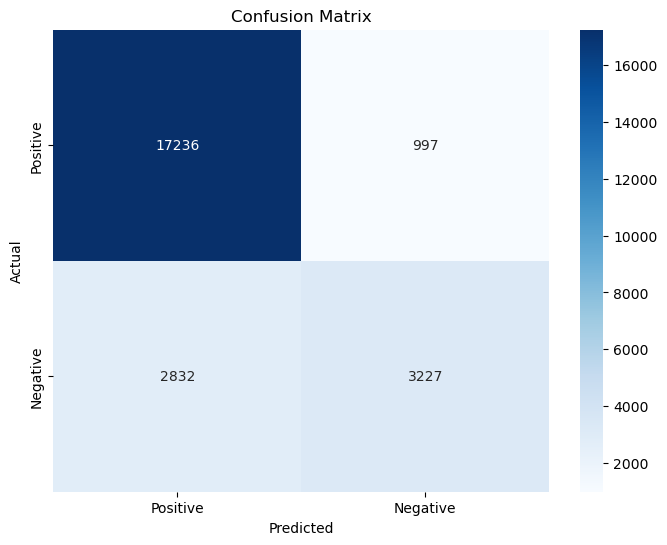

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# calculate confusion matrix
cm = confusion_matrix(labels_binary_test, labels_tfidf_predicted_test, labels=[1, 0]) 
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [20]:
print("Tfidf vectors (train split) P/R/A/F1: {:.3f}, {:.3f}, {:.3f}, {:.3f}".format(precision, recall, accuracy, f1))
print("Tfidf vectors (test split) P/R/A/F1: {:.3f}, {:.3f}, {:.3f}, {:.3f}".format(precision_test, recall_test, accuracy_test, f1_test))

Tfidf vectors (train split) P/R/A/F1: 0.865, 0.953, 0.853, 0.907
Tfidf vectors (test split) P/R/A/F1: 0.859, 0.945, 0.842, 0.900


Analysis

The performance on the training set is slightly better than the test set. The slight drop in performance on the test split suggests that the model is not overfitting very much. Both the train and test models have good precision (high rate of predicting positive correctly). Both models also have very high recall scores, meaning the models are effective in identifying all actual true positive cases. The high F1 score for each model shows a good balance of precision and recall. The decently high accuracy for each model suggests that the model is effectively classifying the sentiment.

## Yelp Business and Reviews

### Cleaning and combining datasets

In [4]:
# load business and review datasets
df_yelp_business = pd.read_csv('data/yelp_business.csv')
df_yelp_review = pd.read_csv('data/yelp_review.csv')

In [5]:
# remove businesses that do not classify as a restaurant
df_yelp_business = df_yelp_business[df_yelp_business['categories'].str.contains('restaurant', case=False, na=False)]

In [6]:
df_yelp_business.head(3)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants
10,XOSRcvtaKc_Q5H1SAzN20A,"""East Coast Coffee""",NaN,"""737 West Pike St""",Houston,PA,15342,40.241548,-80.212815,4.5,3,0,Breakfast & Brunch;Gluten-Free;Coffee & Tea;Fo...


In [27]:
df_yelp_business.shape

(54630, 13)

In [28]:
df_yelp_review.head(3)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0


In [29]:
df_yelp_review.shape

(5261668, 9)

In [7]:
# combine datasets based on the business_id
df_combined = pd.merge(df_yelp_review, df_yelp_business, on='business_id', how='inner')
df_combined.head(3)

,review_id,user_id,business_id,stars_x,date,text,useful,funny,cool,name,...,address,city,state,postal_code,latitude,longitude,stars_y,review_count,is_open,categories
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,"""Wilensky's""",...,"""34 Avenue Fairmount Ouest""",Montréal,QC,H2T 2M1,45.523333,-73.594859,4.0,84,1,Diners;Food;Restaurants;Delis
1,vm1b1keOzwHjtGZEPPuYXA,xYciRtVZ1PW4IxSX4oJ1aw,AEx2SYEUJmTxVVB18LlCwA,5,2016-02-22,*The shop was featured on Mind of a Chef with ...,4,3,4,"""Wilensky's""",...,"""34 Avenue Fairmount Ouest""",Montréal,QC,H2T 2M1,45.523333,-73.594859,4.0,84,1,Diners;Food;Restaurants;Delis
2,SXwA9KZ-Nc_hMARk_3cJ7g,5Ymfsf9fAYz-Ds_p0xawVQ,AEx2SYEUJmTxVVB18LlCwA,5,2013-03-29,"As its name suggests, Wilensky's is a lunch co...",9,0,3,"""Wilensky's""",...,"""34 Avenue Fairmount Ouest""",Montréal,QC,H2T 2M1,45.523333,-73.594859,4.0,84,1,Diners;Food;Restaurants;Delis


In [31]:
df_combined.shape

(3221555, 21)

In [12]:
# remove unnecessary columns

columns_to_remove = ['user_id', 'useful', 'funny', 'cool', 'address', 'is_open', 'neighborhood']
df_cleaned = df_combined.drop(columns=columns_to_remove)
df_cleaned.head(3)

,review_id,business_id,stars_x,date,text,name,city,state,postal_code,latitude,longitude,stars_y,review_count,categories
0,vkVSCC7xljjrAI4UGfnKEQ,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,"""Wilensky's""",Montréal,QC,H2T 2M1,45.523333,-73.594859,4.0,84,Diners;Food;Restaurants;Delis
1,vm1b1keOzwHjtGZEPPuYXA,AEx2SYEUJmTxVVB18LlCwA,5,2016-02-22,*The shop was featured on Mind of a Chef with ...,"""Wilensky's""",Montréal,QC,H2T 2M1,45.523333,-73.594859,4.0,84,Diners;Food;Restaurants;Delis
2,SXwA9KZ-Nc_hMARk_3cJ7g,AEx2SYEUJmTxVVB18LlCwA,5,2013-03-29,"As its name suggests, Wilensky's is a lunch co...","""Wilensky's""",Montréal,QC,H2T 2M1,45.523333,-73.594859,4.0,84,Diners;Food;Restaurants;Delis


In [13]:
# randomly sample data to reduce size

sample_fraction = 0.01
df_sampled = df_cleaned.sample(frac=sample_fraction, random_state=1)

# should be over 30,000 samples
df_sampled.shape

(32216, 14)

### Applying TF-IDF Vectorizer

In [14]:
# preprocessing text data

# convert to lowercase
df_sampled['text'] = df_sampled['text'].str.lower() 

# remove punctuation
df_sampled['text'] = df_sampled['text'].str.replace(r'[^\w\s]', '', regex=True)

df_sampled.head(3)

,review_id,business_id,stars_x,date,text,name,city,state,postal_code,latitude,longitude,stars_y,review_count,categories
1947193,kz_ss1Dpo848R14iZ1DuDA,h_g5HV6Fw2rinZ3xqFwygw,5,2011-01-19,this is honestly one of my favorite buffets in...,"""Seasons Buffet""",Las Vegas,NV,89139,36.041868,-115.184348,3.5,287,Buffets;Restaurants
1348323,T_xJybu2_MnPdAwcdx0KMw,SzcCJJmreMlWCsNjupdVAA,5,2017-06-09,we are outoftown visitors from new york city a...,"""L'Albatros""",Cleveland,OH,44106,41.511744,-81.606395,4.5,546,Restaurants;French
2390913,kLlDKG784HwnZ4Uq6BubPg,QH1lePb3lwTKRF_OXH_6uw,1,2012-01-17,i used to go to opa every week but i heard it ...,"""Opa Restaurant""",Las Vegas,NV,89146,36.142940,-115.242469,3.5,62,Restaurants;Greek;Mediterranean


In [36]:
# vectorize text data using fitted TF-IDF vectorizer
sample_tfidf_vectors = tfidf_vectorizer.transform(df_sampled['text'])


# predict sentiment labels
predicted_labels = lr_tfidf.predict(sample_tfidf_vectors)
predicted_labels

array([1, 0, 1, ..., 1, 1, 1])

In [37]:
# store predictions in the DF 
df_sampled['predicted_sentiment'] = ['positive' if label == 1 else 'negative' for label in predicted_labels]

print(df_sampled[['text', 'predicted_sentiment']].head(10))

                                                      text predicted_sentiment
1947193  came her for my birthday and everything was am...            positive
1348323  i will refuse to come to this location again b...            negative
2390913  i have never actually had a good time at this ...            positive
1151566  we had dinner here this week after being entic...            positive
2361052  got the prime rib here on my last vegas trip i...            positive
1020919  i would give 5 stars if that old lady would be...            negative
2351389  delicious breakfast and fast friendly service ...            positive
2188523  i have been dying to go here since a coworkers...            positive
238102   some of the best food in downtown the poutine ...            positive
1071593  showed up at 400 it was not that busy i had th...            positive


### Further Analysis

In [39]:
# map star ratings to sentiment labels
def map_stars_to_sentiment(stars):
    if stars >= 3:
        return 'positive'
    elif stars < 3:
        return 'negative'

# create a new column for true sentiment
df_sampled['true_sentiment'] = df_sampled['stars_x'].apply(map_stars_to_sentiment)

print(df_sampled[['stars_x', 'true_sentiment']].head(10))

         stars_x true_sentiment
1947193        5       positive
1348323        1       negative
2390913        3       positive
1151566        5       positive
2361052        4       positive
1020919        4       positive
2351389        5       positive
2188523        4       positive
238102         5       positive
1071593        4       positive


Confusion Matrix:
 [[23401  2192]
 [ 1212  5411]]


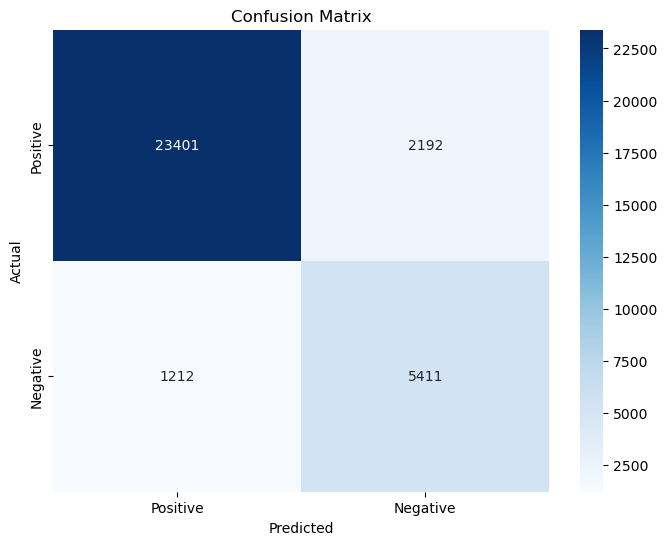

In [40]:
from sklearn.metrics import classification_report
import numpy as np

# calculate confusion matrix
cm = confusion_matrix(df_sampled['true_sentiment'], df_sampled['predicted_sentiment'], labels=['positive', 'negative'])
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [41]:
# classification report
print(classification_report(df_sampled['true_sentiment'], df_sampled['predicted_sentiment']))

              precision    recall  f1-score   support

    negative       0.71      0.82      0.76      6623
    positive       0.95      0.91      0.93     25593

    accuracy                           0.89     32216
   macro avg       0.83      0.87      0.85     32216
weighted avg       0.90      0.89      0.90     32216



This model performs very well for positive reviews with high precision, recall, and F1-scores. It's a really useful model if someone is trying to identify positive reviews across different domains. The performance for the negative class is a bit lower with a precision of only 71% and an F1-score of 76%. This may be due to the random sampling and class weighting for the data or how I chose to classify the star ratings as either positive or negative. 

### Review Sentiments Across Different Locations (by City)

In [44]:
# counts of each city
df_sampled['city'].value_counts()

city
Las Vegas       9196
Phoenix         3317
Toronto         3046
Scottsdale      1790
Charlotte       1610
                ... 
Oka                1
Weddington         1
Missisauga         1
Mount Albert       1
Cramerton          1
Name: count, Length: 383, dtype: int64

In [45]:
df_sampled['city'] = df_sampled['city'].str.lower().str.strip()
df_sampled.head(3)

,review_id,business_id,stars_x,date,text,name,city,state,postal_code,latitude,longitude,stars_y,review_count,categories,predicted_sentiment,true_sentiment
1947193,UdbSqUb_Eadz6bsH3V8-Ig,LFs5jyYdXlzi0SpAYi1eSA,5,2016-01-12,came her for my birthday and everything was am...,"""Maggiano's Little Italy""",las vegas,NV,89109,36.127783,-115.168968,4.0,1250,Nightlife;Bars;Italian;Restaurants,positive,positive
1348323,e8rGhwPielvSOTWEs1idsw,uoEV1AxIm3_XFxiScYWrbA,1,2015-01-31,i will refuse to come to this location again b...,"""Paradise Bakery & Cafe""",glendale,AZ,85308,33.642095,-112.225680,3.5,12,Cafes;Restaurants;Bakeries;Food,negative,negative
2390913,5CsGTuMbnVvFTY55QhZa0A,vF58mwG-9Bx67S6hxKZ68A,3,2010-01-20,i have never actually had a good time at this ...,"""Frank & Tony's""",willoughby,OH,44094,41.640863,-81.407730,2.5,19,Nightlife;Bars;Pizza;Restaurants,positive,positive


In [91]:
# average star rating and predicted sentiment per city
location_metrics = df_sampled.groupby('city').agg(
    Avg_Rating=('stars_x', 'mean'),  # Calculate mean star rating
    Positive_Count=('predicted_sentiment', lambda x: (x == 'positive').sum()),
    Negative_Count=('predicted_sentiment', lambda x: (x == 'negative').sum())
).reset_index()

location_metrics['Total_Reviews'] = location_metrics['Positive_Count'] + location_metrics['Negative_Count']
location_metrics['Positive_Percentage'] = (location_metrics['Positive_Count'] / location_metrics['Total_Reviews']) * 100
location_metrics['Negative_Percentage'] = (location_metrics['Negative_Count'] / location_metrics['Total_Reviews']) * 100

location_metrics

,city,Avg_Rating,Positive_Count,Negative_Count,Total_Reviews,Positive_Percentage,Negative_Percentage
0,ahwatukee,4.600000,5,0,5,100.000000,0.000000
1,ajax,3.850000,19,1,20,95.000000,5.000000
2,allison park,3.250000,2,2,4,50.000000,50.000000
3,ambridge,4.666667,3,0,3,100.000000,0.000000
4,amherst,4.142857,5,2,7,71.428571,28.571429
...,...,...,...,...,...,...,...
372,woodbridge,4.125000,7,1,8,87.500000,12.500000
373,woodmere,3.333333,15,9,24,62.500000,37.500000
374,woodmere village,2.600000,3,2,5,60.000000,40.000000
375,york,3.800000,3,2,5,60.000000,40.000000


In [93]:
# top 20 cities with their respective metrics

top_20_cities = location_metrics.sort_values(by='Total_Reviews', ascending=False).head(20)
top_20_cities

,city,Avg_Rating,Positive_Count,Negative_Count,Total_Reviews,Positive_Percentage,Negative_Percentage
161,las vegas,3.753532,6993,2209,9202,75.994349,24.005651
263,phoenix,3.797709,2596,721,3317,78.263491,21.736509
333,toronto,3.638214,2380,666,3046,78.135259,21.864741
300,scottsdale,3.823464,1399,391,1790,78.156425,21.843575
53,charlotte,3.649068,1201,409,1610,74.596273,25.403727
267,pittsburgh,3.746845,992,276,1268,78.233438,21.766562
330,tempe,3.695297,742,236,978,75.869121,24.130879
212,montréal,3.837158,777,138,915,84.918033,15.081967
132,henderson,3.750308,609,204,813,74.907749,25.092251
51,chandler,3.808123,534,180,714,74.789916,25.210084


C:\Users\Nat\AppData\Local\Temp\ipykernel_27360\299233916.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_cities, x='city', y='Positive_Percentage', palette='viridis')


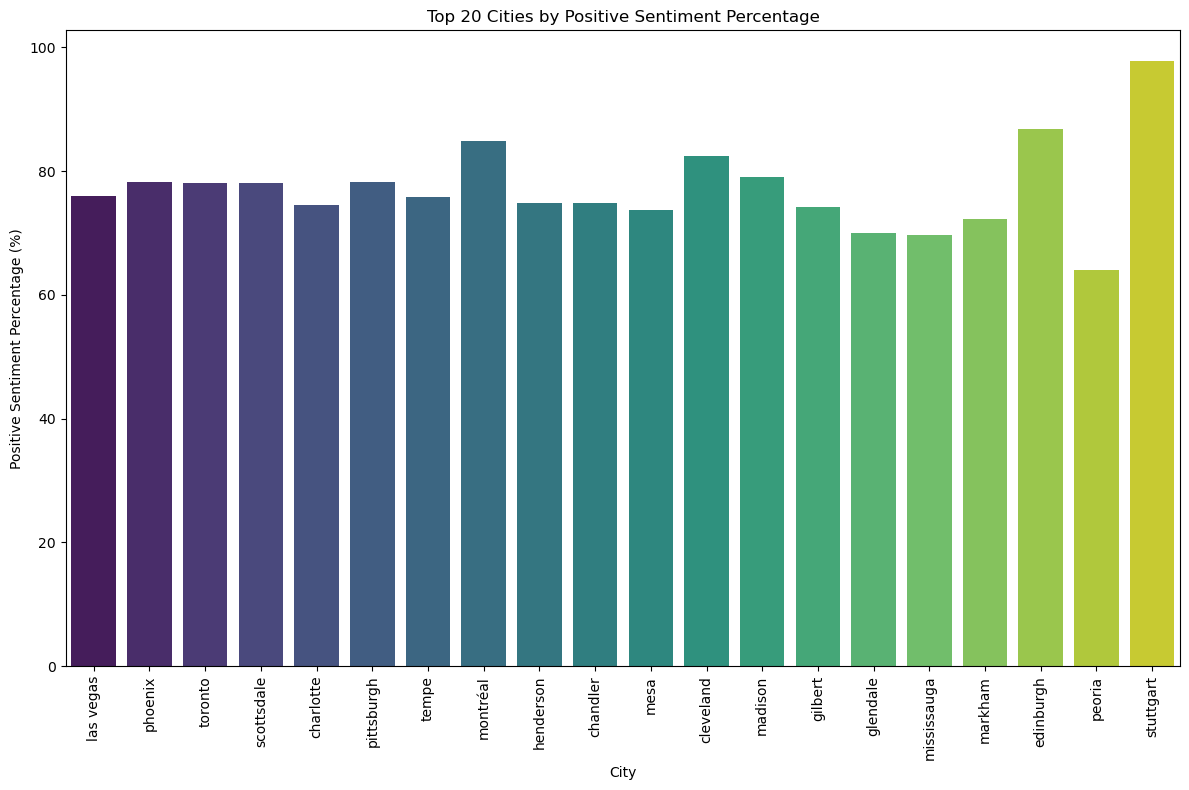

In [95]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_20_cities, x='city', y='Positive_Percentage', palette='viridis')
plt.title('Top 20 Cities by Positive Sentiment Percentage')
plt.xlabel('City')
plt.ylabel('Positive Sentiment Percentage (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\Nat\AppData\Local\Temp\ipykernel_27360\2428816824.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_cities, x='city', y='Negative_Percentage', palette='flare')


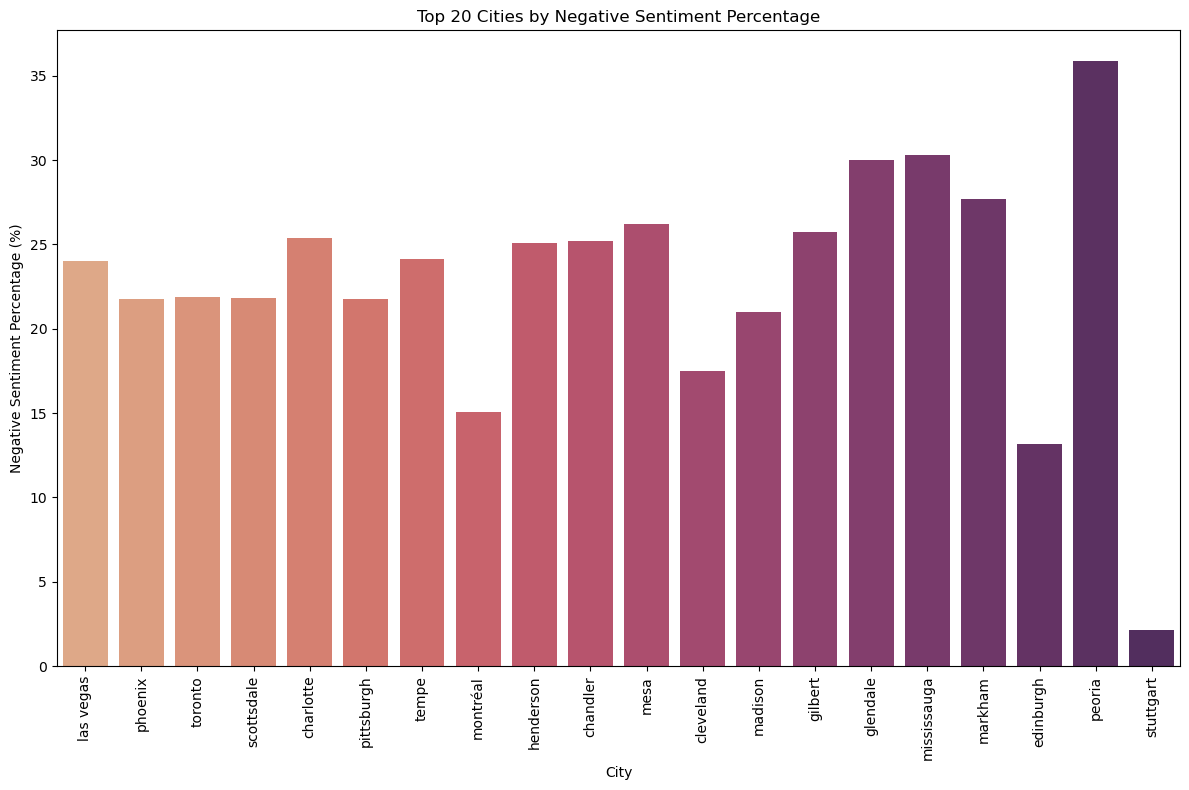

In [97]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_20_cities, x='city', y='Negative_Percentage', palette='flare')
plt.title('Top 20 Cities by Negative Sentiment Percentage')
plt.xlabel('City')
plt.ylabel('Negative Sentiment Percentage (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

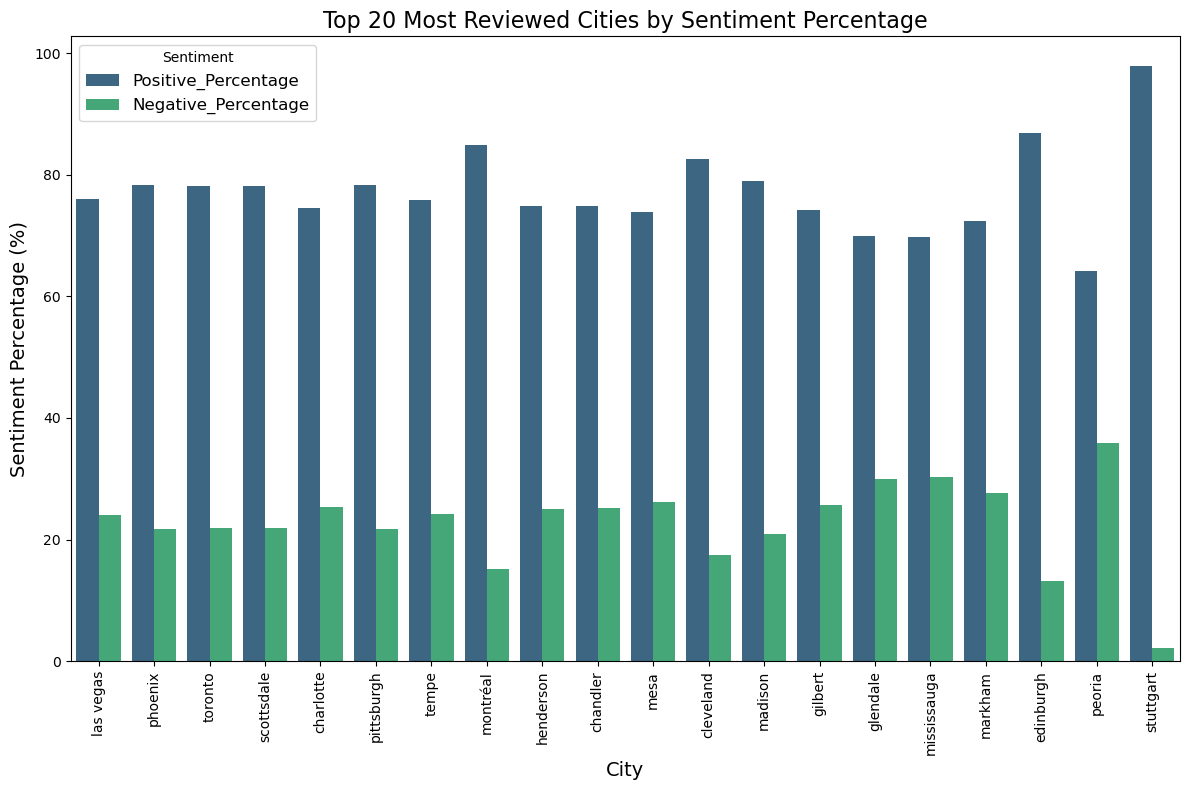

In [111]:
melted_data = top_20_cities.melt(id_vars='city', 
                                 value_vars=['Positive_Percentage', 'Negative_Percentage'], 
                                 var_name='Sentiment', 
                                 value_name='Percentage')

plt.figure(figsize=(12, 8))
sns.barplot(data=melted_data, x='city', y='Percentage', hue='Sentiment', palette='viridis')

plt.title('Top 20 Most Reviewed Cities by Sentiment Percentage', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Sentiment Percentage (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.legend(title='Sentiment', fontsize=12)
plt.tight_layout()

plt.show()

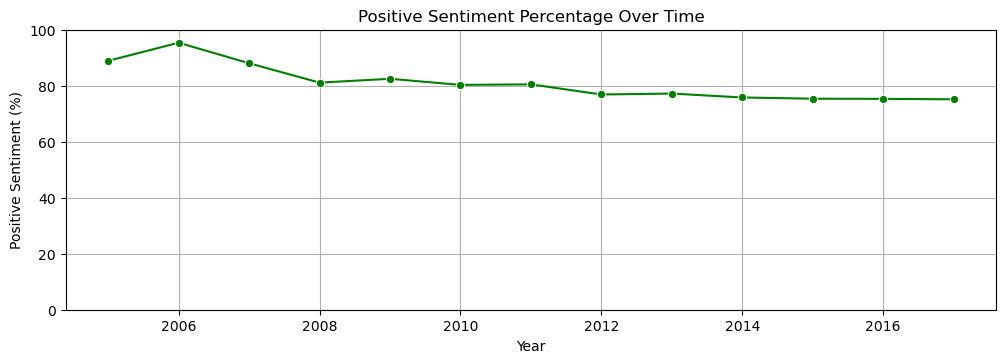

In [49]:
df_sampled['date'] = pd.to_datetime(df_sampled['date'])
df_sampled['year'] = df_sampled['date'].dt.year

time_trends = df_sampled.groupby('year').agg(
    Avg_Rating=('stars_x', 'mean'),
    Positive_Percentage=('predicted_sentiment', lambda x: (x == 'positive').sum() / len(x) * 100)
).reset_index()

# positive sentiment percentage
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 2)
sns.lineplot(data=time_trends, x='year', y='Positive_Percentage', marker='o', color='green')
plt.title('Positive Sentiment Percentage Over Time')
plt.xlabel('Year')
plt.ylabel('Positive Sentiment (%)')
plt.ylim(0, 100)
plt.grid(True)

plt.show()

In [15]:
import spacy
import pandas as pd
#load spaCy model
nlp = spacy.load("en_core_web_sm")
# check if a review mentions being sick from food
def mentions_sickness(review):
    if pd.isna(review):  # Handle missing values
        return False
    doc = nlp(review.lower())
    health_keywords = {"sick", "ill", "vomit", "nausea", "food poisoning", "mold"} #determined key “sick” food words
    for token in doc:
        if token.text in health_keywords:
            return True
    return False
#apply function
df_sampled["sick_from_food"] = df_sampled["text"].apply(mentions_sickness)
display(df_sampled["sick_from_food"].head())
display(df_sampled)

1947193    False
1348323    False
2390913    False
1151566    False
2361052    False
Name: sick_from_food, dtype: bool

,review_id,business_id,stars_x,date,text,name,city,state,postal_code,latitude,longitude,stars_y,review_count,categories,sick_from_food
1947193,kz_ss1Dpo848R14iZ1DuDA,h_g5HV6Fw2rinZ3xqFwygw,5,2011-01-19,this is honestly one of my favorite buffets in...,"""Seasons Buffet""",Las Vegas,NV,89139,36.041868,-115.184348,3.5,287,Buffets;Restaurants,False
1348323,T_xJybu2_MnPdAwcdx0KMw,SzcCJJmreMlWCsNjupdVAA,5,2017-06-09,we are outoftown visitors from new york city a...,"""L'Albatros""",Cleveland,OH,44106,41.511744,-81.606395,4.5,546,Restaurants;French,False
2390913,kLlDKG784HwnZ4Uq6BubPg,QH1lePb3lwTKRF_OXH_6uw,1,2012-01-17,i used to go to opa every week but i heard it ...,"""Opa Restaurant""",Las Vegas,NV,89146,36.142940,-115.242469,3.5,62,Restaurants;Greek;Mediterranean,False
1151566,mzreriHOHgQXDMFrVrtFmw,fP4sMlVw_MvyGNv4xeTGDA,4,2015-10-08,a second pielogy location awesome i used to go...,"""Pieology Pizzeria""",Las Vegas,NV,89169,36.114884,-115.155604,4.0,189,Pizza;Restaurants,False
2361052,wPlUz9H1c1nEpTf-FkTs9g,TK4nUh28mp1rJAgA3hQCUQ,5,2016-04-17,this place is awesome from the minute we walk...,"""Cowboys Saloon""",Phoenix,AZ,85054,33.676586,-111.966367,3.0,75,Nightlife;Restaurants;Barbeque;Bars;American (...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263079,gCgQ3WfG8kBgZsEIWcN0eA,UPIYuRaZvknINOd1w8kqRQ,5,2016-01-07,this is my favorite place to eat with a cheap ...,"""Monta Ramen""",Las Vegas,NV,89146,36.127034,-115.209682,4.0,2291,Restaurants;Noodles;Ramen;Japanese,False
2443321,t0ohwLsy2ri4nr79on5yOw,fCJrZIzz85_8Uhf072QVnA,1,2017-03-31,as new scottsdale residents we have been tryin...,"""Village Tavern""",Scottsdale,AZ,85258,33.564378,-111.924470,4.0,295,Bars;American (Traditional);Burgers;American (...,False
2555173,MqwDP_vei81kuKjthF3y-g,NKHvmp19c6wrm0dZXcLtmQ,5,2017-01-19,i pity those who left bad reviews explaining h...,"""Sugar Marmalade""",Mississauga,ON,L5C 3X3,43.577260,-79.653254,3.0,120,Desserts;Food;Chinese;Coffee & Tea;Taiwanese;E...,False
1403659,bSWfilMmA2ZnW3n2pYXDtQ,SiKr66AlgQWPqebYm5LfcQ,5,2014-08-26,this pizza rocks as often as i have been able ...,"""H&H City Pizza""",Chandler,AZ,85248,33.246427,-111.842835,4.0,43,Chicken Wings;Pizza;Food;Restaurants,False


In [16]:
#count the num of sick reveiws
false_count = df_sampled["sick_from_food"].value_counts().get(True, 0)
print(f"The number of ‘True’ entries in the ‘sick_from_food’ column is: {false_count}")

#fildter just the sick review columns
sick_reviews = df_sampled[df_sampled["sick_from_food"] == True]
print("Filter rows where 'sick_from_food' is True:")
print(sick_reviews.head())

#group by restaurant name and count the number of sick reviews
sick_counts = sick_reviews.groupby(["name", "city"]).size().reset_index(name="sick_review_count")

#sort sick reviews
sick_counts = sick_counts.sort_values(by="sick_review_count", ascending=False)

#show result
print("Restaurants with the highest number of sick reviews:")
print(sick_counts.head(10))

The number of ‘True’ entries in the ‘sick_from_food’ column is: 1630
Filter rows where 'sick_from_food' is True:
                      review_id             business_id  stars_x        date  \
444633   3syMi83nwRJuMwCJJrzULQ  HhVmDybpU7L50Kb5A0jXTg        4  2014-11-30   
1124266  0J_BScloTw_pEaPA1j1ZSw  EUWBT5GDxPC95w9itZ1EHw        4  2016-10-01   
1785938  MBDYTm_yRgUAS69XmfMyuA  VdlPZg2NAu8t8GkdbPLecg        3  2014-03-31   
1396344  NKahlUpLqwoHna-1WsZ3fA  TKaND6oV1n2ylnCYoAfoag        3  2017-06-19   
1555292  nfkYOuvm_7PF0ozbllZzxw  On8O41uCKj1GfF1Bt4S2Lg        3  2016-06-26   

                                                      text  \
444633   this place is over the top the food is great a...   
1124266  so impressed by this buffet unbelievably inexp...   
1785938  this will echo what most of the other reviewer...   
1396344  droppin some stars unfortunately i always reco...   
1555292  the only reason this place has 3 stars from me...   

                                 

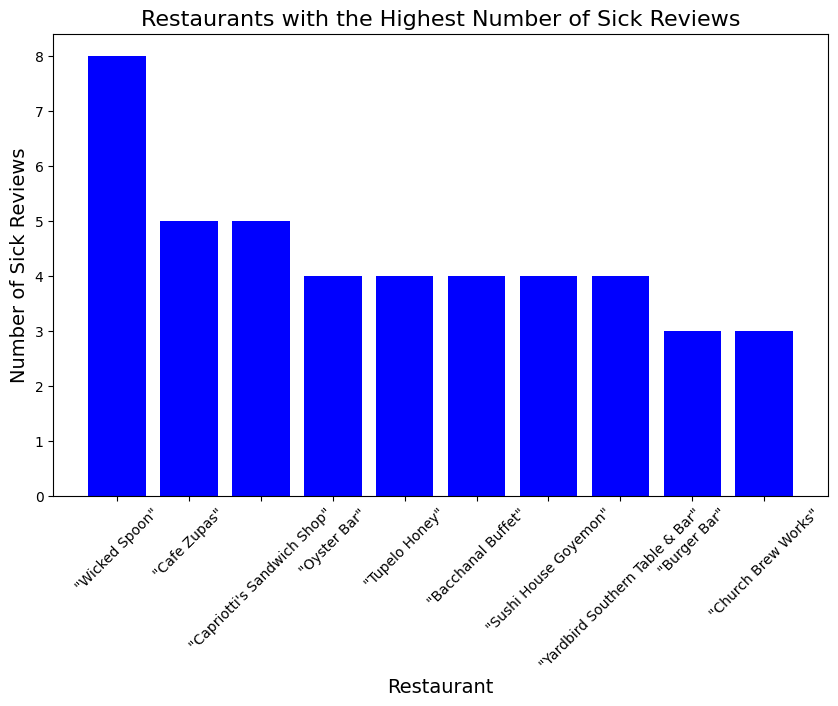

In [19]:
import matplotlib.pyplot as plt

#finding the top 10
top_10_restaurants = sick_counts.nlargest(10, "sick_review_count")

#display chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_restaurants["name"], top_10_restaurants["sick_review_count"], color="blue")
plt.xlabel("Restaurant", fontsize=14)
plt.ylabel("Number of Sick Reviews", fontsize=14)
plt.title("Restaurants with the Highest Number of Sick Reviews", fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [20]:
#group by city and count sick reviews
sick_counts = sick_reviews.groupby(["city"]).size().reset_index(name="sick_review_count")

#sort by number of sick reviews in descending order
sick_counts = sick_counts.sort_values(by="sick_review_count", ascending=False)

#show result
print("Restaurants with the highest number of sick reviews:")
print(sick_counts.head(10))

Restaurants with the highest number of sick reviews:
           city  sick_review_count
55    Las Vegas                466
87      Phoenix                167
107     Toronto                140
95   Scottsdale                 94
88   Pittsburgh                 85
22    Charlotte                 69
104       Tempe                 51
46    Henderson                 49
66         Mesa                 40
24    Cleveland                 38


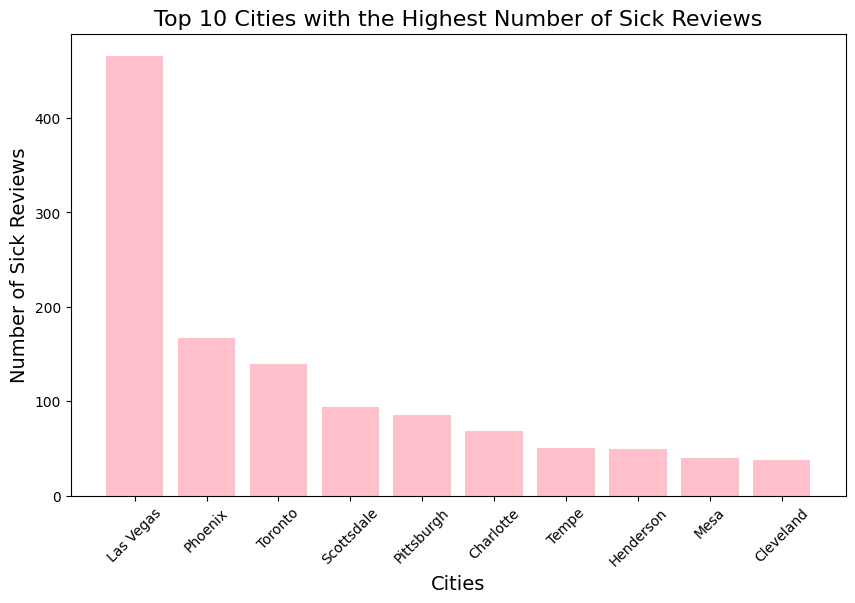

In [24]:
#top 10 cities for sick reviews
top_10_cities = sick_counts.groupby("city")["sick_review_count"].sum().nlargest(10).reset_index()

#plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_cities["city"], top_10_cities["sick_review_count"], color="pink")
plt.xlabel("Cities", fontsize=14)
plt.ylabel("Number of Sick Reviews", fontsize=14)
plt.title("Top 10 Cities with the Highest Number of Sick Reviews", fontsize=16)
plt.xticks(rotation=45)
plt.show()